# Bankruptcy

In the following notebook, I'll try to classify the bankruptcy data from the Taiwan Economic Journal for the years 1999–2009

### Importing the libraries

In [41]:
###General DS libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [42]:
dataset = pd.read_csv('data.csv')
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [43]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

We see no missing values.
The first column is binary and our dependent varibale.
the rest 95 columns are suppose to be our independent variables.

Due to the large amount of independent variables, I will check for multicolinearity and other mutual information, trying to reduce the future model's dimensions.

### Feature Selection

In [44]:
##Training AND Feature Selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [46]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([3.15887057e-02, 3.21323198e-02, 2.76242088e-02, 1.22533987e-02,
       1.15467935e-02, 1.73460957e-02, 2.73662398e-02, 2.73356218e-02,
       2.37901273e-02, 3.22700925e-02, 7.99911654e-04, 0.00000000e+00,
       1.17789082e-02, 0.00000000e+00, 1.43629385e-02, 3.00692050e-02,
       2.84728269e-02, 2.68885697e-02, 4.03748515e-02, 7.52394424e-03,
       4.16163079e-03, 1.81209457e-02, 3.59898327e-02, 6.04306095e-03,
       2.86053213e-03, 1.18054100e-02, 1.17626047e-02, 9.80054589e-03,
       1.26165461e-02, 2.82364103e-02, 8.16019725e-03, 1.99232276e-04,
       2.01716312e-02, 1.98677805e-02, 3.33862956e-02, 2.69811530e-02,
       3.05363924e-02, 2.98397538e-02, 9.81710380e-03, 3.48932044e-02,
       1.89680716e-03, 1.73166593e-02, 3.56598516e-02, 3.81814238e-03,
       3.24631398e-03, 4.58554090e-04, 7.36640268e-04, 1.86475808e-03,
       3.78687347e-03, 0.00000000e+00, 0.00000000e+00, 1.61291839e-02,
       4.47132486e-03, 2.12782710e-02, 5.85748707e-03, 0.00000000e+00,
      

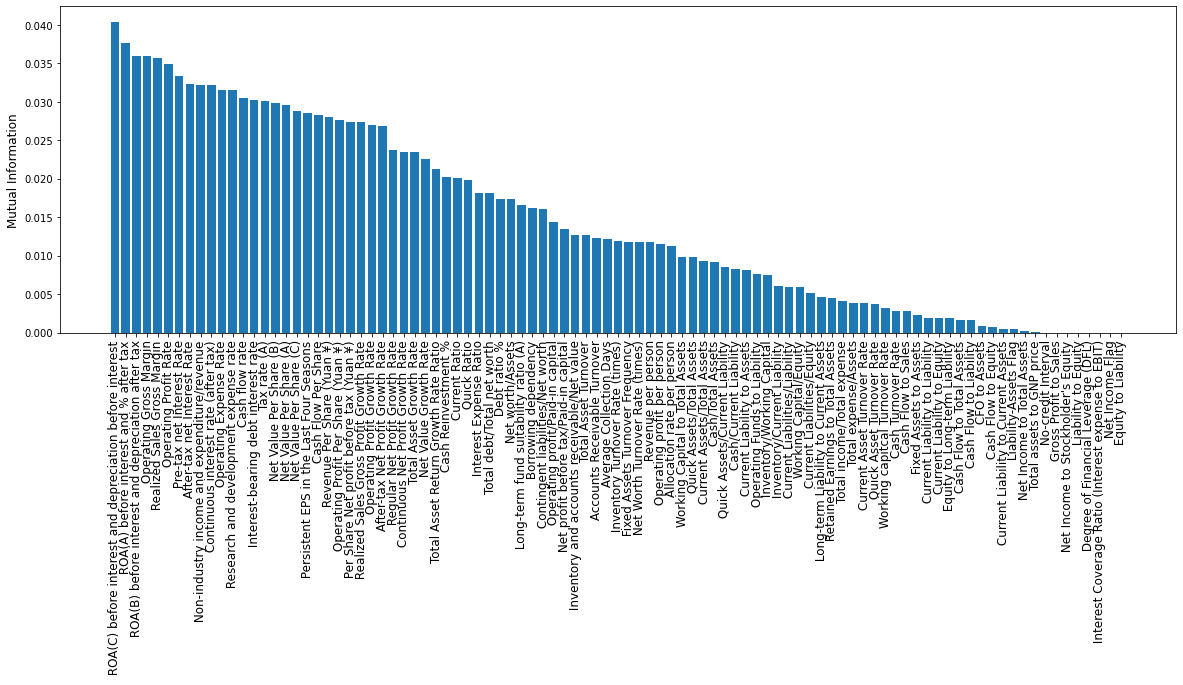

In [48]:
mutual_info_visual = pd.Series(mutual_info)
names = dataset.drop('Bankrupt?', axis = 1).columns
mutual_info_visual = mutual_info_visual.sort_values(ascending = False)

plt.figure(figsize=(20,6))
plt.bar(names, mutual_info_visual)
plt.xticks(rotation=90, fontsize='12')
plt.ylabel('Mutual Information', fontsize = '12')
plt.show()

Clearly we have a lot of mutual information between the independet variables. I'll use the K-Best to proceed.

In [49]:
k_best = SelectKBest(mutual_info_classif, k = 10)

X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

### Feature Scaling

In [50]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Classification Models

In [52]:
##Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

##Evaluation Models
from sklearn.metrics import confusion_matrix, accuracy_score

In [53]:
##Decision Tree Classification

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

acc_DT_class = round(accuracy_score(y_test, y_pred)*100,2)
acc_DT_class

95.09

Text(0, 0.5, 'Error Rate')

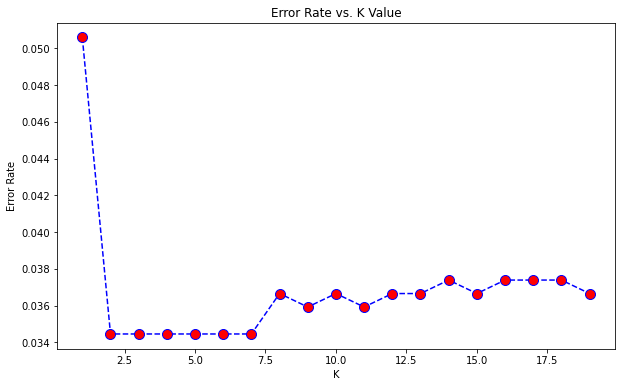

In [54]:
##KNN - Elbow Method

error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
##KNN

classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
acc_KNN = round(accuracy_score(y_test, y_pred)*100,2)
acc_KNN

96.48

In [56]:
##SVM

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

acc_SVM = round(accuracy_score(y_test, y_pred)*100,2)
acc_SVM

96.26

In [57]:
#SVR
classifier = SVR(kernel = 'rbf',)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

for prediction in range(0,len(y_pred)):
    if(y_pred[prediction]>0.5):
        y_pred[prediction]=1
    else:
        y_pred[prediction]=0

acc_SVR = round(accuracy_score(y_test, y_pred)*100,2)
acc_SVR

96.33

In [58]:
##Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

acc_log_reg = round(accuracy_score(y_test, y_pred)*100,2)
acc_log_reg

96.55

In [59]:
##Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

acc_naive = round(accuracy_score(y_test, y_pred)*100,2)
acc_naive

94.94

In [60]:
#Random Forest Classification
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

acc_RFC =  round(accuracy_score(y_test, y_pred)*100,2)
acc_RFC

96.63

In [61]:
models = pd.DataFrame({
    'Model': ['Decision Tree Classification', 'KNN',
             'SVM','SVR','Logistic Regression','Naive Bayes', 'Random Forest Classification'],
    'Score': [acc_DT_class,acc_KNN,acc_SVM,acc_SVR,acc_log_reg,acc_naive,acc_RFC]})
models.sort_values(by='Score', ascending = False)

,Model,Score
6,Random Forest Classification,96.63
4,Logistic Regression,96.55
1,KNN,96.48
3,SVR,96.33
2,SVM,96.26
0,Decision Tree Classification,95.09
5,Naive Bayes,94.94


### Applying k-Fold Cross Validation

We can see that the Random Forest Classicication got the best accuracy score.
I'll do now final evaluation of the model.

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
#Random Forest Classification
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
y_hat = classifier.predict(X_train)


In [64]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 96.88 %
Standard Deviation: 0.25 %


### Applying Grid Search to find the best model and the best parameters

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
classifier.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [67]:
parameters = [{'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90],
               'criterion': ['entropy','gini'],
              'random_state': [0]}]

grid_search = GridSearchCV(estimator = classifier, 
                          param_grid = parameters, 
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters: ", best_parameters)

Best Accuracy: 97.05 %
Best Parameters:  {'criterion': 'gini', 'n_estimators': 50, 'random_state': 0}


### Creating the final model

In [70]:
#Random Forest Classification
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'gini', random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1308    5]
 [  38   13]]


With accuracy of 97%, our model is finaly ready to predict bankruptcy.